In [1]:
import numpy as np                                                                                                                 
import math
import pandas as pd 
import numpy as np 
import xlrd

loc_y=('Velocity_PSM_Z_temp.xlsx')  
print(loc_y)
wb = xlrd.open_workbook(loc_y)

sheet = wb.sheet_by_index(0)

#for i in range(1,sheet.ncols): 
#	print(sheet.cell_value(0, i)) 

x = sheet.cell_value(0,sheet.ncols-1)
vel_mesh = np.zeros((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))

for i in range(1,sheet.ncols): 
    x = (sheet.cell_value(0, i)) 
    ag=x.split('(')[1].split(')')[0].split('x') 
    vel=float(sheet.cell_value(1, i)) 
    vel_mesh[int(ag[0])-1][int(ag[1])-1][int(ag[2])-1] = vel 

#creating zones:
vel_max = vel_mesh.max()
vel_min = vel_mesh.min()

print('Vel_max = '+str(vel_max))
print('Vel_min = '+str(vel_min))
print('Vel_max-Vel_min = '+str(abs(vel_max-vel_min)))

# zoning

zone = []
for i in range(len(vel_mesh.flatten())):
    if vel_mesh.flatten()[i] == 0:
        zone.append(0)
    if vel_mesh.flatten()[i] > 0:
        zone.append(1)
    if vel_mesh.flatten()[i] < 0:
        zone.append(-1)
        
zone_3d = np.asarray(zone).reshape((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))

Velocity_PSM_Z_temp.xlsx
Vel_max = 0.305159512947304
Vel_min = -0.277256269940776
Vel_max-Vel_min = 0.58241578288808


In [2]:
loc_filled=('NumParticles_temp1.xlsx')  
print(loc_filled)
wb = xlrd.open_workbook(loc_filled)

sheet = wb.sheet_by_index(0)

#for i in range(1,sheet.ncols): 
#	print(sheet.cell_value(0, i)) 

x = sheet.cell_value(0,sheet.ncols-1)
num_mesh = np.zeros((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))
filled_mesh = np.zeros((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))

for i in range(1,sheet.ncols): 
    x = (sheet.cell_value(0, i)) 
    ag=x.split('(')[1].split(')')[0].split('x') 
    num=float(sheet.cell_value(1, i)) 
    num_mesh[int(ag[0])-1][int(ag[1])-1][int(ag[2])-1] = num
    if num > 0:
        filled_mesh[int(ag[0])-1][int(ag[1])-1][int(ag[2])-1] = 1
    else:
        filled_mesh[int(ag[0])-1][int(ag[1])-1][int(ag[2])-1] = 0

NumParticles_temp1.xlsx


In [3]:
zone_filled_3d = np.ones((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))
zone_filled_3d = np.array(zone_filled_3d)*(-2)

for x in range(10):
    for i in range(20):
        for j in range(20):
            if filled_mesh[x][i][j] == 1:
                zone_filled_3d[x][i][j] = zone_3d[x][i][j]

In [4]:
# Corresponding functions:

def createneighbordict(grid, specifiedvalue):
    neighbordict = {}
    boundary = np.where(grid == specifiedvalue)
    x = boundary[0]
    y = boundary[1]
    for i in range(len(x)):
        neighbordict[x[i],y[i]] = listofneighbors(x[i],y[i], grid, specifiedvalue)
    return neighbordict

#function to evaluate immediate neighbors if 1 for selected (x,y) pair:
def listofneighbors(i,j,Grid, value):
    neighborlist = []
    neighborlist2 = []
    #Overall 8 neighbors - (i,j) --> (i+1,j),(i-1,j),(i,j+1),(i,j-1),(i-1,j+1),(i+1,j+1),(i-1,j-1),(i+1,j-1)
    if Grid[i,j] == value: # non-boundary point of grid (8 neighbors)
        if i == len(Grid)-1:
            if Grid[i,j-1] == value and j-1 >= 0:
                neighborlist.append([i,j-1])
            if Grid[i-1,j] == value:
                neighborlist.append([i-1,j])
            if Grid[i-1,j-1] == value and j-1>= 0:
                neighborlist.append([i-1,j-1])
            if j < len(Grid)-1:
                if Grid[i-1,j+1] == value:
                    neighborlist.append([i-1,j+1])
                if Grid[i,j+1] == value:
                    neighborlist.append([i,j+1])
                
        elif j == len(Grid)-1:
            if i < len(Grid)-1:
                if Grid[i+1,j] == value:
                    neighborlist.append([i+1,j])
                if Grid[i+1,j-1] == value:
                    neighborlist.append([i+1,j-1])
            if Grid[i,j-1] == value:
                neighborlist.append([i,j-1])
            if Grid[i-1,j] == value and i-1 >= 0:
                neighborlist.append([i-1,j])
            if Grid[i-1,j-1] == value and i-1>= 0:
                neighborlist.append([i-1,j-1])
                
        else:
            if Grid[i+1,j] == value:
                neighborlist.append([i+1,j])
            if Grid[i+1,j-1] == value and j-1 >=0:
                neighborlist.append([i+1,j-1])
            if Grid[i+1,j+1] == value:
                neighborlist.append([i+1,j+1])
            if Grid[i,j-1] == value and j-1 >= 0:
                neighborlist.append([i,j-1])
            if Grid[i,j+1] == value:
                neighborlist.append([i,j+1])
            if Grid[i-1,j] == value and i-1 >= 0:
                neighborlist.append([i-1,j])
            if Grid[i-1,j-1] == value and j-1 >= 0 and i-1 >= 0:
                neighborlist.append([i-1,j-1])
            if Grid[i-1,j+1] == value and i-1 >= 0:
                neighborlist.append([i-1,j+1])
        [neighborlist2.append(x) for x in neighborlist if x not in neighborlist2]  
        
        return(neighborlist2)
    
def connectedcells(Ndict,x, array):
    #print('the initial array is:{}'.format(array))
    if x not in array:
        #print(x)
        array.append(x)
        
    for j in Ndict[x]:
        if tuple(j) not in array:
            #print(j)
            array.append(tuple(j))
            #print('after appending:{}'.format(array))
            array.append(listflat(listflat(connectedcells(Ndict, tuple(j), array))))
    finalarray = []
    [finalarray.append(x) for x in listflat(array) if x not in finalarray]
    return(finalarray)

#function to flatten a nested list:
def listflat(b):
    alist = []
    for i in b:
        if len(np.shape(i)) > 1:
            for ind in i:
                alist.append(ind)
        else:
            alist.append(i)
    return(alist)

# Create contiguous zones for specific value in selected grid:
def printCC(value, grid):
    CC = {}
    k = 0
    #Calling function createneighbordict:
    Ndictvel = createneighbordict(grid,value)
    if grid[(0,0)] == value:
        CC[k] = connectedcells(Ndictvel,(0,0),[])  
    for i in Ndictvel.keys():
        if i not in list(listflat(CC.values())):
                k = k + 1
                CC[k] = connectedcells(Ndictvel, i, [])
    return CC

In [5]:
# Create contiguous zones zone_cont_z based on zone_mesh_z

zone_cont_z= np.zeros((10,20,20))
newvalz = np.zeros(10)

for m in range(10):
    print(np.amax(zone_filled_3d[m]))
    newvalz[m] = 0
    for i in [-1,0,1]:
        print(i,newvalz[m])
        CCdict = list(printCC(i, zone_filled_3d[m]).values())
        print(CCdict)
        if len(CCdict) == 0:
            continue
        if len(CCdict) >= 1:
            for j in range(len(CCdict)):
                newvalz[m] = newvalz[m] + 1
                A = CCdict[j]
                B = zip(*A)
                Blist = list(B)
                x = Blist[0]
                y = Blist[1]
                for k in range(len(x)):
                    zone_cont_z[m][x[k]][y[k]] = newvalz[m]
        else:
            newvalz[m] = newvalz[m] + 1
        
print(np.amax(zone_cont_z), newvalz)

1.0
-1 0.0
[[(3, 2), (4, 2), (5, 3), (4, 3), (3, 3)], [(8, 0), (8, 1)], [(8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 5), (18, 6), (19, 7), (18, 7), (19, 8), (17, 7), (17, 6), (17, 5), (16, 5), (16, 6), (16, 7), (17, 8), (17, 9), (18, 10), (17, 10), (16, 10), (16, 9), (16, 8), (15, 8), (15, 7), (15, 6), (15, 5), (14, 5), (14, 6), (14, 7), (14, 8), (15, 9), (15, 10), (14, 9), (13, 8), (13, 7), (13, 6), (13, 5), (12, 5), (12, 6), (11, 5), (10, 5), (17, 3), (16, 3), (16, 2), (15, 2), (15, 1), (14, 1), (14, 2), (15, 3), (14, 3), (13, 3), (13, 2), (13, 1), (13, 0), (12, 0), (12, 1), (12, 2), (12, 3), (11, 3), (11, 2), (9, 3)], [(10, 0)]]
0 4.0
[]
1 4.0
[[(4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2), (10, 2), (11, 1), (11, 0), (10, 1), (9, 1), (9, 0), (10, 3), (8, 3), (7, 3), (7, 2), (6, 2), (6, 3), (5, 2), (7, 0), (6, 0)], [(18, 8), (19, 9), (18, 9), (19, 10), (18, 11), (19, 11)]]
1.0
-1 0.0
[[(4, 3), (5, 3)], [(7, 0), (8, 1), (9, 1), (10, 2

7.0 [6. 5. 3. 4. 7. 7. 7. 5. 5. 6.]


Contour plot of zones_velocity of Z:


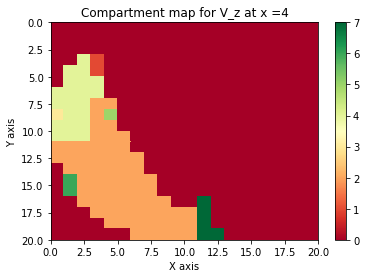

In [6]:
import matplotlib as mpl
import matplotlib.colors as colors
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

# Figures at X location identified by zloc
zloc = 4
#Contour plot of zones_velocity of Y:
X = np.arange(0,21)
Y = np.arange(0,21)
Z = zone_cont_z[zloc]
import matplotlib.pyplot as plt 
print('Contour plot of zones_velocity of Z:')

plt.figure()

pcm = plt.pcolormesh(X, Y, Z,cmap='RdYlGn', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
#pcm = plt.pcolormesh(X, Y, Z,cmap='Spectral', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
plt.gca().invert_yaxis()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Compartment map for V_z at x ='+str(zloc))
plt.colorbar()
plt.show()

In [7]:
import numpy as np                                                                                                                 
import math
import pandas as pd 
import numpy as np 
import xlrd

loc_y=('Velocity_PSM_Y_temp.xlsx')  
print(loc_y)
wb = xlrd.open_workbook(loc_y)

sheet = wb.sheet_by_index(0)

#for i in range(1,sheet.ncols): 
#	print(sheet.cell_value(0, i)) 

x = sheet.cell_value(0,sheet.ncols-1)
vel_meshy = np.zeros((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))

for i in range(1,sheet.ncols): 
    x = (sheet.cell_value(0, i)) 
    ag=x.split('(')[1].split(')')[0].split('x') 
    vel=float(sheet.cell_value(1, i)) 
    vel_meshy[int(ag[0])-1][int(ag[1])-1][int(ag[2])-1] = vel 

#creating zones:
vel_max = vel_mesh.max()
vel_min = vel_mesh.min()

print('Vel_max = '+str(vel_max))
print('Vel_min = '+str(vel_min))
print('Vel_max-Vel_min = '+str(abs(vel_max-vel_min)))
# zoning

zone = []
for i in range(len(vel_mesh.flatten())):
    if vel_meshy.flatten()[i] == 0:
        zone.append(0)
    if vel_meshy.flatten()[i] > 0:
        zone.append(1)
    if vel_meshy.flatten()[i] < 0:
        zone.append(-1)
        
zone_3dy = np.asarray(zone).reshape((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))

Velocity_PSM_Y_temp.xlsx
Vel_max = 0.305159512947304
Vel_min = -0.277256269940776
Vel_max-Vel_min = 0.58241578288808


In [8]:
zone_filled_3dy = np.ones((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))
zone_filled_3dy = np.array(zone_filled_3dy)*(-2)

for x in range(10):
    for i in range(20):
        for j in range(20):
            if filled_mesh[x][i][j] == 1:
                zone_filled_3dy[x][i][j] = zone_3dy[x][i][j]

In [9]:
# Create contiguous zones zone_cont_z based on zone_mesh_z

zone_cont_y= np.zeros((10,20,20))
newvaly = np.zeros(10)

for m in range(10):
    newvaly[m] = 0
    for i in [-1,0,1]:
        #print(i,newvalz[m])
        CCdict = list(printCC(i, zone_filled_3dy[m]).values())
        print(i, len(CCdict))
        print(CCdict)
        if len(CCdict) == 0:
            continue
        if len(CCdict) >= 1:
            for j in range(len(CCdict)):
                newvaly[m] = newvaly[m] + 1
                A = CCdict[j]
                B = zip(*A)
                Blist = list(B)
                x = Blist[0]
                y = Blist[1]
                for k in range(len(x)):
                    zone_cont_y[m][x[k]][y[k]] = newvaly[m]
        else:
            newvaly[m] = newvaly[m] + 1
        
print(np.amax(zone_cont_y), newvaly)

-1 1
[[(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 3), (17, 4), (18, 5), (18, 6), (19, 7), (18, 7), (18, 8), (19, 9), (18, 9), (19, 10), (18, 10), (19, 11), (18, 11), (17, 10), (17, 9), (17, 8), (17, 7), (17, 6), (17, 5), (16, 5), (16, 4), (16, 3), (15, 3), (15, 4), (15, 5), (16, 6), (15, 6), (15, 7), (16, 8), (16, 9), (16, 10), (15, 10), (15, 9), (15, 8), (14, 8), (14, 7), (14, 6), (14, 5), (14, 4), (14, 3), (14, 2), (13, 2), (13, 3), (13, 4), (13, 5), (13, 6), (13, 7), (13, 8), (14, 9), (12, 6), (12, 5), (12, 4), (12, 3), (12, 2), (11, 2), (11, 3), (11, 4), (11, 5), (10, 5), (10, 4), (10, 3), (10, 2), (9, 2), (9, 3), (9, 4), (8, 4), (8, 3), (8, 2), (7, 2), (7, 3), (6, 3), (6, 2), (5, 2), (4, 2), (13, 0), (12, 0), (11, 0), (10, 0), (9, 0), (8, 0), (7, 0), (6, 0)]]
0 0
[]
1 4
[[(3, 2), (4, 3), (5, 3), (3, 3)], [(15, 1)], [(16, 7)], [(19, 8)]]
-1 1
[[(3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (

Contour plot of zones_velocity of Y:


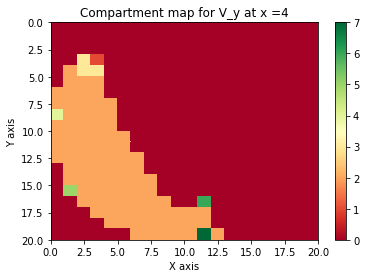

In [10]:
import matplotlib as mpl
import matplotlib.colors as colors
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

# Figures at X location identified by zloc
zloc = 4
#Contour plot of zones_velocity of Y:
X = np.arange(0,21)
Y = np.arange(0,21)
Z = zone_cont_y[zloc]
import matplotlib.pyplot as plt 
print('Contour plot of zones_velocity of Y:')

plt.figure()

pcm = plt.pcolormesh(X, Y, Z,cmap='RdYlGn', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
#pcm = plt.pcolormesh(X, Y, Z,cmap='Spectral', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
plt.gca().invert_yaxis()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Compartment map for V_y at x ='+str(zloc))
plt.colorbar()
plt.show()

In [11]:
# Function for overlapping contiguous zones.

def overlapzone(A,B):
    # Arrays need to be 1D
    if len(A) != len(B):
        print('Arrays of different length - error')
        exit(1)
    else:
        Zone = np.zeros(len(A))
        ab = []
        for j in range(len(A)):
            ab.append((A[j],B[j]))
        Zone[0]=1
        i = 1
        while i <=len(ab)-1:
            if ab[i] in ab[:i]:
                Zone[i] = Zone[ab[:i].index(ab[i])]
            else:
                Zone[i] = max(Zone)+1
            i = i + 1
        return(Zone)

In [12]:
zone_cont_z_1D = zone_cont_z.flatten()
zone_cont_y_1D = zone_cont_y.flatten()

zone_cont_overlap = overlapzone(zone_cont_z_1D,zone_cont_y_1D)

zone_cont_overlap_3D = zone_cont_overlap.reshape(10,20,20)
print(np.max(zone_cont_overlap_3D), np.average(zone_cont_overlap_3D))
for x in np.arange(0,10):
    print(np.max(zone_cont_overlap_3D[x]))

33.0 2.6165
11.0
13.0
13.0
14.0
23.0
25.0
28.0
30.0
33.0
28.0


Overlap contour plot of zones_velocities (V_y & V_z):


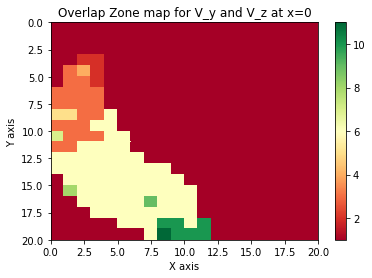

In [13]:
# Figures at X location for zone_cont_overlap
zloc = 0
#Contour plot of zones_velocity of Y:
X = np.arange(0,21)
Y = np.arange(0,21)
Z = zone_cont_overlap_3D[zloc]
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
print('Overlap contour plot of zones_velocities (V_y & V_z):')
plt.figure()

pcm = plt.pcolormesh(X, Y, Z,cmap='RdYlGn', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
#pcm = plt.pcolormesh(X, Y, Z,cmap='Spectral', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
plt.gca().invert_yaxis()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Overlap Zone map for V_y and V_z at x='+str(zloc))
plt.colorbar()
plt.show()

In [14]:
# Constructing newval for overlapped array:

newval_overlap = []
for i in range(10):
    newval_overlap.append(np.amax(zone_cont_overlap_3D[i]))
print(newval_overlap)

[11.0, 13.0, 13.0, 14.0, 23.0, 25.0, 28.0, 30.0, 33.0, 28.0]


In [15]:
%store zone_cont_overlap_3D

Stored 'zone_cont_overlap_3D' (ndarray)


In [16]:
# Evalauting velocity for overlaid zone map 
# This is evaluated separately for Y direction using vel_meshy

def return_velocity_array(grid, newval, velmesh):
    vel_av_zone = []
    newval = [int(i) for i in newval]

    for m in range(10):
        vel_av_zone.append([])
        for i in range(newval[m]):
            boundary = np.where(grid[m] == i+1)
            x = boundary[0]
            y = boundary[1]
            if len(x) == 0:
                # Here, a value of 10 is assigned.
                vel_av_zone[m].append(10)
            else:
                vel_av_zone[m].append(np.average(velmesh[m][x,y]))
    return(vel_av_zone)

vel_overlap_zones_y = return_velocity_array(zone_cont_overlap_3D, newval_overlap, vel_meshy)
vel_overlap_zones_z = return_velocity_array(zone_cont_overlap_3D, newval_overlap, vel_mesh)

In [17]:
print(len(vel_overlap_zones_y[9]))
print(vel_overlap_zones_y[0])

28
[0.0, 0.010904488221457617, -0.0032483152508482036, -0.00151930677308146, -0.0012719873136411998, -0.022578107086874032, -0.000784803464990932, 1.18140689329562e-06, 0.00112304038813369, -0.024200856631468936, 0.00410289202147735]


In [18]:
def calculate_interfacial_area(grid2d, zonenum, j):
    nsize = len(grid2d)
    x = np.where(grid2d == zonenum)[0]
    y = np.where(grid2d == zonenum)[1]
    listnotinsamezone = {}
    for i in range(len(x)):
            listnotinsamezone[x[i],y[i]] = []
            if x[i] > 0 and x[i] < (nsize-1):
                if y[i] > 0 and y[i] < (nsize-1):
                    if grid2d[x[i]-1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]-1, y[i]])
                    if grid2d[x[i], y[i]-1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]-1])
                    if grid2d[x[i]+1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]+1, y[i]])
                    if grid2d[x[i], y[i]+1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]+1])
                if y[i] == 0:
                    if grid2d[x[i]-1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]-1, y[i]])
                    if grid2d[x[i]+1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]+1, y[i]])
                    if grid2d[x[i], y[i]+1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]+1])
                if y[i] == (nsize-1):
                    if grid2d[x[i]-1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]-1, y[i]])
                    if grid2d[x[i], y[i]-1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]-1])
                    if grid2d[x[i]+1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]+1, y[i]])
            if x[i] == 0:
                if y[i] == 0:
                    if grid2d[x[i]+1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]+1, y[i]])
                    if grid2d[x[i], y[i]+1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]+1])
                if y[i] == (nsize-1):
                    if grid2d[x[i], y[i]-1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]-1])
                    if grid2d[x[i]+1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]+1, y[i]])
                if y[i] > 0 and y[i] < (nsize-1):
                    if grid2d[x[i], y[i]-1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]-1])
                    if grid2d[x[i]+1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]+1, y[i]])
                    if grid2d[x[i], y[i]+1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]+1])

            if x[i] == (nsize-1):
                if y[i] == 0:
                    if grid2d[x[i]-1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]-1, y[i]])
                    if grid2d[x[i], y[i]+1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]+1])
                if y[i] == (nsize-1):
                    if grid2d[x[i]-1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]-1, y[i]])
                    if grid2d[x[i], y[i]-1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]-1])
                if y[i] > 0 and y[i] < (nsize-1):
                    if grid2d[x[i]-1, y[i]] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i]-1, y[i]])
                    if grid2d[x[i], y[i]-1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]-1])
                    if grid2d[x[i], y[i]+1] == j:
                        listnotinsamezone[x[i],y[i]].append([x[i], y[i]+1])
                    
    # returning interfacial area as calculated below.           
    #print(listnotinsamezone,sum(map(len, listnotinsamezone.values())))
    return sum(map(len, listnotinsamezone.values())) 

In [19]:
from itertools import permutations

Plist = list(permutations(range(5), 2))
print(Plist, len(Plist))

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)] 20


In [20]:
print(Plist)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)]


In [21]:
# function for interfacial area array:

from itertools import permutations

def return_interfacial_area_array(grid, xvalue):
    zones = np.arange(np.amax(grid[xvalue]))
    tot = list(permutations(zones,2))
    interfacial_area = []
    
    for i in tot:
        interfacial_area.append(calculate_interfacial_area(grid[xvalue].astype(int), i[0].astype(int),i[1].astype(int)))
    return(interfacial_area)

print(return_interfacial_area_array(zone_cont_overlap_3D, 0))
print(len(return_interfacial_area_array(zone_cont_overlap_3D, 0)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 28, 0, 2, 0, 3, 0, 6, 2, 2, 0, 0, 0, 0, 0, 0, 0, 6, 2, 2, 5, 10, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 28, 0, 10, 0, 0, 0, 2, 4, 6, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0]
110


In [24]:
for x in np.arange(0,10):
    print(len(return_interfacial_area_array(zone_cont_overlap_3D,x)))
print(newval_overlap)

110
156
156
182
506
600
756
870
1056
756
[11.0, 13.0, 13.0, 14.0, 23.0, 25.0, 28.0, 30.0, 33.0, 28.0]


In [30]:
# Function to evaluate flowrate:
# Flowrate direction - for tot = (0,1), it should be bigger - smaller i.e. 1 - 0 based on the direction of Y.

from itertools import permutations

def return_flowrate_array(grid, xvalue, newval, velmesh):
    zones = np.arange(np.amax(grid[xvalue]))
    tot = list(permutations(zones,2))
    flowrate = []
    for i in range(len(tot)):
        #print(return_interfacial_area_array(zone_cont_y,1)[i]*(vel_av_zone[1][int(tot[i][0])-1]-vel_av_zone[1][int(tot[i][1])-1]))
        flowrate.append((return_interfacial_area_array(grid,xvalue)[i]*(return_velocity_array(grid,newval,velmesh)[xvalue][int(tot[i][0])-1]-return_velocity_array(grid,newval, velmesh)[xvalue][int(tot[i][1])-1])))
    return(flowrate)

#print(return_flowrate_array(zone_cont_y, 4, newvaly))
#print(return_flowrate_array(zone_cont_y, 1, newvaly))
print(return_flowrate_array(zone_cont_z, 4, newvalz, vel_mesh))
print(return_flowrate_array(zone_cont_z, 2, newvalz, vel_mesh))
print(len(return_flowrate_array(zone_cont_z, 2, newvalz, vel_mesh)))

[0.3188593159933367, 4.309802670499573, 0.0, 0.8333182958382533, 0.10422653204520228, 0.3085464001401544, -0.3188593159933367, 0.0, -0.0, -0.00636495505399172, -0.0, -0.0, -4.309802670499573, -0.0, -0.0, -0.4927748335462307, -0.18460532738357466, -0.18873852337902713, -0.0, 0.0, 0.0, -0.001839465624393715, -0.0, -0.0, -0.8333182958382533, 0.00636495505399172, 0.4927748335462307, 0.001839465624393715, 0.0, -0.0, -0.10422653204520228, 0.0, 0.18460532738357466, 0.0, -0.0, -0.0, -0.3085464001401544, 0.0, 0.18873852337902713, 0.0, 0.0, 0.0]
[0.0027194700440571957, 2.044472209578622, -0.0027194700440571957, 0.0, -2.044472209578622, -0.0]
6


In [26]:
print(return_flowrate_array(zone_cont_overlap_3D, 4, newval_overlap, vel_meshy))
print(len(return_flowrate_array(zone_cont_overlap_3D, 4, newval_overlap, vel_mesh)))

[0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0049383132535153, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.006585685599287525, -0.000729926942532408, -0.00228055458286427, 1.0071989640969465, 0.0181354938258012, 0.00326175350163762, -0.00237531133024942, -0.1926061533141186, 0.2285061775736589, 0.0, 0.0, 0, 0.0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0049383132535153, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0028341200980238537, -0.00474971120962192, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0

In [29]:
print(list(permutations(np.arange(np.amax(zone_cont_overlap_3D[4])),2)))
print(len(list(permutations(np.arange(np.amax(zone_cont_overlap_3D[4])),2))))

print(return_flowrate_array(zone_cont_overlap_3D, 4, newval_overlap, vel_mesh))
print(len(return_flowrate_array(zone_cont_overlap_3D, 4, newval_overlap, vel_mesh)))

[(0.0, 1.0), (0.0, 2.0), (0.0, 3.0), (0.0, 4.0), (0.0, 5.0), (0.0, 6.0), (0.0, 7.0), (0.0, 8.0), (0.0, 9.0), (0.0, 10.0), (0.0, 11.0), (0.0, 12.0), (0.0, 13.0), (0.0, 14.0), (0.0, 15.0), (0.0, 16.0), (0.0, 17.0), (0.0, 18.0), (0.0, 19.0), (0.0, 20.0), (0.0, 21.0), (0.0, 22.0), (1.0, 0.0), (1.0, 2.0), (1.0, 3.0), (1.0, 4.0), (1.0, 5.0), (1.0, 6.0), (1.0, 7.0), (1.0, 8.0), (1.0, 9.0), (1.0, 10.0), (1.0, 11.0), (1.0, 12.0), (1.0, 13.0), (1.0, 14.0), (1.0, 15.0), (1.0, 16.0), (1.0, 17.0), (1.0, 18.0), (1.0, 19.0), (1.0, 20.0), (1.0, 21.0), (1.0, 22.0), (2.0, 0.0), (2.0, 1.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (2.0, 6.0), (2.0, 7.0), (2.0, 8.0), (2.0, 9.0), (2.0, 10.0), (2.0, 11.0), (2.0, 12.0), (2.0, 13.0), (2.0, 14.0), (2.0, 15.0), (2.0, 16.0), (2.0, 17.0), (2.0, 18.0), (2.0, 19.0), (2.0, 20.0), (2.0, 21.0), (2.0, 22.0), (3.0, 0.0), (3.0, 1.0), (3.0, 2.0), (3.0, 4.0), (3.0, 5.0), (3.0, 6.0), (3.0, 7.0), (3.0, 8.0), (3.0, 9.0), (3.0, 10.0), (3.0, 11.0), (3.0, 12.0), (3.0, 13.0), (3.0, 14

506


In [27]:
for xloc in np.arange(0, 10):
    Farray = return_flowrate_array(zone_cont_overlap_3D, xloc, newval_overlap, vel_mesh)
    print(len(Farray))

110
156
156
182
506
600
756
870
1056
756


In [28]:
print(newval_overlap)

[11.0, 13.0, 13.0, 14.0, 23.0, 25.0, 28.0, 30.0, 33.0, 28.0]


In [31]:
import xlsxwriter, collections

workbook = xlsxwriter.Workbook('radialwork_ax0.xlsx')
worksheet = workbook.add_worksheet('radial')

worksheet.write('A1', 'No_Compartments')
row = 0
col = 0
worksheet.write(row + 1, col, newval_overlap[0])
row = row + 1

from string import ascii_uppercase
import itertools
first_char = [''] + list(ascii_uppercase)
def iter_excel_columns():
    for char1, char2 in itertools.product(first_char, ascii_uppercase):
            yield char1 + char2

alphabetlist = []

for s in iter_excel_columns():
    alphabetlist.append(s)
    if s == 'bb':
        break
#print(alphabetlist)
print(str(alphabetlist[1]))

worksheet.write('B1', 'Fz_0')
row = 0
col = 1
for i in return_flowrate_array(zone_cont_overlap_3D, 0, newval_overlap, vel_mesh):
    worksheet.write(row + 1, col, i)
    row = row + 1
    
worksheet.write('C1', 'Fy_0')
row = 0
col = 2

for i in return_flowrate_array(zone_cont_overlap_3D, 0, newval_overlap, vel_meshy):
    worksheet.write(row + 1, col, i)
    row = row + 1
        
worksheet.write('D1', 'V_0')
row = 0
col = 3

c = dict(collections.Counter(zone_cont_overlap_3D[0].flatten()))
value = c.values()
print(value)
for i in list(value):
    worksheet.write(row + 1, col, i)
    row = row + 1

workbook.close()

B
dict_values([298, 4, 21, 1, 2, 64, 1, 1, 1, 6, 1])


In [36]:
import xlsxwriter, collections

workbook = xlsxwriter.Workbook('radialwork_ax0.xlsx')
worksheet = workbook.add_worksheet('radial')

worksheet.write('A1', 'No_Compartments')
row = 0
col = 0
for i in newval_overlap:
    worksheet.write(row + 1, col, i)
    row = row + 1

from string import ascii_uppercase
import itertools
first_char = [''] + list(ascii_uppercase)
def iter_excel_columns():
    for char1, char2 in itertools.product(first_char, ascii_uppercase):
            yield char1 + char2

alphabetlist = []

for s in iter_excel_columns():
    alphabetlist.append(s)
    if s == 'bb':
        break
#print(alphabetlist)
print(str(alphabetlist[1]))

worksheet.write('B1', 'Fz_'+str(x))
row = 0
col = 1
for i in return_flowrate_array(zone_cont_overlap_3D, 0, newval_overlap, vel_mesh):
    worksheet.write(row + 1, col, i)
    row = row + 1
    
worksheet.write('C1', 'Fy_0')
row = 0
col = 2

for i in return_flowrate_array(zone_cont_overlap_3D, 0, newval_overlap, vel_meshy):
    worksheet.write(row + 1, col, i)
    row = row + 1
        
worksheet.write('D1', 'V_0')
row = 0
col = 3

c = dict(collections.Counter(zone_cont_overlap_3D[0].flatten()))
value = c.values()
print(value)
for i in list(value):
    worksheet.write(row + 1, col, i)
    row = row + 1

workbook.close()

B
dict_values([298, 4, 21, 1, 2, 64, 1, 1, 1, 6, 1])


In [37]:
print(collections.Counter(zone_cont_overlap_3D[3].flatten()))

def return_area(xloc, grid, value):
    return(np.count_nonzero(grid[xloc].flatten() == value))

print(return_area(3, zone_cont_overlap_3D, 1))

def return_area_2(xloc, grid, val):
    return(len(np.where(grid[xloc] == val)))

print(newval_overlap)

xloc = 5
vol = []
for val in np.arange(0, int(newval_overlap[xloc])):
    vol.append(return_area(xloc, zone_cont_overlap_3D,val))
print(vol, len(vol))

Counter({1.0: 305, 5.0: 63, 7.0: 26, 4.0: 3, 14.0: 1, 6.0: 1, 12.0: 1})
305
[11.0, 13.0, 13.0, 14.0, 23.0, 25.0, 28.0, 30.0, 33.0, 28.0]
[0, 312, 1, 20, 3, 3, 55, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2] 25


In [39]:
import xlsxwriter, collections

workbook = xlsxwriter.Workbook('radialwork.xlsx')
worksheet = workbook.add_worksheet('radial')

worksheet.write('A1', 'No_Compartments')
row = 0
col = 0
for i in newval_overlap:
    worksheet.write(row + 1, col, i)
    row = row + 1

from string import ascii_uppercase
import itertools
first_char = [''] + list(ascii_uppercase)
def iter_excel_columns():
    for char1, char2 in itertools.product(first_char, ascii_uppercase):
            yield char1 + char2

alphabetlist = []

for s in iter_excel_columns():
    alphabetlist.append(s)
    if s == 'bb':
        break
        
print(newval_overlap)

for x in np.arange(0,10):
    worksheet.write(str(alphabetlist[3*x+1])+'1', 'Fz_'+str(x))
    row = 0
    col = 3*x+1
    for i in return_flowrate_array(zone_cont_overlap_3D, x, newval_overlap, vel_mesh):
        worksheet.write(row + 1, col, i)
        row = row + 1

    worksheet.write(str(alphabetlist[3*x+2])+'1', 'Fy_'+str(x))
    row = 0
    col = 3*x+2

    for i in return_flowrate_array(zone_cont_overlap_3D, x, newval_overlap, vel_meshy):
        worksheet.write(row + 1, col, i)
        row = row + 1

    worksheet.write(str(alphabetlist[3*x+3])+'1', 'V_'+str(x))
    row = 0
    col = 3*x+3
    
    vol = []
    for val in np.arange(0, int(newval_overlap[x])):
        vol.append(return_area(x, zone_cont_overlap_3D, val))
    print(vol, len(vol), x)
    for j in list(vol):
        worksheet.write(row + 1, col, j)
        row = row + 1

workbook.close()

[11.0, 13.0, 13.0, 14.0, 23.0, 25.0, 28.0, 30.0, 33.0, 28.0]
[0, 298, 4, 21, 1, 2, 64, 1, 1, 1, 6] 11 0
[0, 304, 1, 1, 1, 71, 18, 1, 1, 0, 0, 0, 1] 13 1
[0, 304, 1, 0, 1, 65, 27, 0, 0, 0, 0, 0, 1] 13 2
[0, 305, 0, 0, 3, 63, 1, 26, 0, 0, 0, 0, 1, 0] 14 3
[0, 302, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 19, 2, 1, 66, 1, 1, 1, 1, 3] 23 4
[0, 312, 1, 20, 3, 3, 55, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2] 25 5
[0, 313, 0, 34, 1, 1, 2, 1, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 1, 1] 28 6
[0, 322, 0, 1, 1, 28, 29, 0, 0, 1, 0, 0, 0, 0, 12, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4] 30 7
[0, 318, 0, 0, 0, 28, 30, 0, 0, 0, 0, 2, 0, 1, 16, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1] 33 8
[0, 314, 0, 0, 35, 0, 21, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 3, 11, 0, 0, 0, 0, 0, 0, 0, 1, 0] 28 9
